In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns
df=load_digits()
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [2]:
df.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [3]:
df.target[0]

0

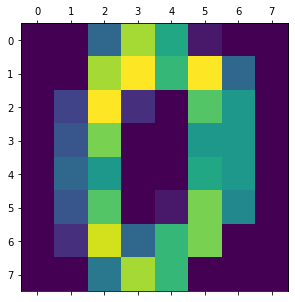

In [4]:
plt.matshow(df.images[0])

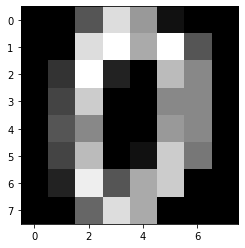

In [5]:
plt.gray()
plt.imshow(df.images[0])

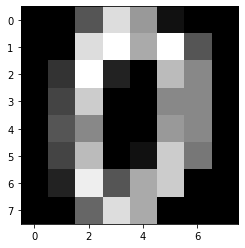

In [6]:
plt.imshow(df.data[0].reshape(8,8))

In [7]:
blend=0
for target in range(10):
    blend+=df.images[target]
blend    

array([[  0.,   0.,  51., 101.,  95.,  36.,  15.,   1.],
       [  0.,  10.,  83., 124., 122.,  92.,  17.,   0.],
       [  0.,   8.,  79., 110.,  79.,  87.,  16.,   0.],
       [  0.,  16.,  89., 106.,  97.,  82.,  24.,   0.],
       [  0.,  13.,  76., 103.,  97.,  80.,  24.,   0.],
       [  0.,  20.,  72.,  91.,  68.,  98.,  41.,   0.],
       [  0.,   6.,  72.,  80.,  98., 115.,  38.,   0.],
       [  0.,   0.,  56., 100., 125.,  74.,  13.,   0.]])

<AxesSubplot:>

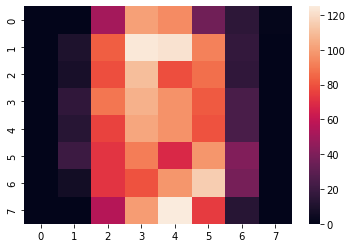

In [8]:
sns.heatmap(blend)

In [9]:
df2=pd.DataFrame(df.data,columns=df.feature_names)
df2['target']=df.target
df2.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.preprocessing import MinMaxScaler
X=df2.drop('target',axis=1)
y=df2.target
scale=MinMaxScaler()
X=scale.fit_transform(X)
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9611111111111111

In [13]:
from sklearn.decomposition import PCA
pca=PCA(0.95) # capture 95% of information
X_pca=pca.fit_transform(X)
X_pca.shape # 64 columns reduced to 30 columns

(1797, 30)

In [14]:
pca.explained_variance_ratio_ # it tells how much variace the new 30 principal components capture

array([0.14815157, 0.13523675, 0.11706654, 0.08316524, 0.05736613,
       0.0485009 , 0.04252881, 0.03677515, 0.03323376, 0.03046634,
       0.02359531, 0.02282286, 0.01821312, 0.01773373, 0.0145856 ,
       0.01396272, 0.0131002 , 0.01243018, 0.01020389, 0.00909605,
       0.00890749, 0.00797984, 0.00788424, 0.0076321 , 0.00690211,
       0.00595599, 0.00576736, 0.00511271, 0.00500826, 0.00442501])

In [15]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=30)
model=LogisticRegression()
model.fit(X_train_pca,y_train_pca)
model.score(X_test_pca,y_test_pca)

0.9611111111111111

In [16]:
pca=PCA(n_components=5)
X_pca=pca.fit_transform(X)
X_pca.shape

(1797, 5)

In [17]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=30)
model=LogisticRegression()
model.fit(X_train_pca,y_train_pca)
model.score(X_test_pca,y_test_pca)

0.8444444444444444

## Exercise : https://github.com/codebasics/py/blob/master/ML/18_PCA/pca_exercise.md